In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 1000
import scipy.stats as stats
import math
import seaborn as sns


In [4]:
sulfurDiOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/SulfurDiOxide_ny_data_2020.csv")
sulfurDiOxide2020.head()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,0,36,55,1007,42401,3,43.14618,-77.54817,WGS84,Sulfur dioxide,...,560,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,ROCHESTER 2,"2 YARMOUTH ROAD, RG&E Substation",New York,Monroe,Rochester,40380.0,"Rochester, NY",2021-01-22
1,1,36,55,1007,42401,3,43.14618,-77.54817,WGS84,Sulfur dioxide,...,560,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,ROCHESTER 2,"2 YARMOUTH ROAD, RG&E Substation",New York,Monroe,Rochester,40380.0,"Rochester, NY",2021-01-22
2,2,36,55,1007,42401,3,43.14618,-77.54817,WGS84,Sulfur dioxide,...,560,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,ROCHESTER 2,"2 YARMOUTH ROAD, RG&E Substation",New York,Monroe,Rochester,40380.0,"Rochester, NY",2021-01-22
3,3,36,55,1007,42401,3,43.14618,-77.54817,WGS84,Sulfur dioxide,...,560,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,ROCHESTER 2,"2 YARMOUTH ROAD, RG&E Substation",New York,Monroe,Rochester,40380.0,"Rochester, NY",2021-01-22
4,4,36,55,1007,42401,3,43.14618,-77.54817,WGS84,Sulfur dioxide,...,560,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,ROCHESTER 2,"2 YARMOUTH ROAD, RG&E Substation",New York,Monroe,Rochester,40380.0,"Rochester, NY",2021-01-22


In [5]:
missingValueCount=sulfurDiOxide2020.isnull().sum()

print(missingValueCount)

Unnamed: 0                 0
state_code                 0
county_code                0
site_number                0
parameter_code             0
poc                        0
latitude                   0
longitude                  0
datum                      0
parameter                  0
sample_duration            0
pollutant_standard      6473
date_local                 0
units_of_measure           0
event_type                 0
observation_count          0
observation_percent        0
validity_indicator         0
arithmetic_mean            0
first_max_value            0
first_max_hour             0
aqi                    19422
method_code                0
method                     0
local_site_name            0
site_address               0
state                      0
county                     0
city                       0
cbsa_code               3611
cbsa                    3611
date_of_last_change        0
dtype: int64


In [6]:
sulfurDiOxide2020.shape
print(sulfurDiOxide2020.dtypes)
print(sulfurDiOxide2020['method_code'].unique())
print(sulfurDiOxide2020['pollutant_standard'].unique())
grouped=sulfurDiOxide2020.groupby(['pollutant_standard'])
print(sulfurDiOxide2020['pollutant_standard'].count())
print(sulfurDiOxide2020['sample_duration'].unique())
print(sulfurDiOxide2020['units_of_measure'].unique())
print(sulfurDiOxide2020['event_type'].unique())

list(sulfurDiOxide2020.columns) 

Unnamed: 0               int64
state_code               int64
county_code              int64
site_number              int64
parameter_code           int64
poc                      int64
latitude               float64
longitude              float64
datum                   object
parameter               object
sample_duration         object
pollutant_standard      object
date_local              object
units_of_measure        object
event_type              object
observation_count        int64
observation_percent    float64
validity_indicator      object
arithmetic_mean        float64
first_max_value        float64
first_max_hour           int64
aqi                    float64
method_code              int64
method                  object
local_site_name         object
site_address            object
state                   object
county                  object
city                    object
cbsa_code              float64
cbsa                    object
date_of_last_change     object
dtype: o

['Unnamed: 0',
 'state_code',
 'county_code',
 'site_number',
 'parameter_code',
 'poc',
 'latitude',
 'longitude',
 'datum',
 'parameter',
 'sample_duration',
 'pollutant_standard',
 'date_local',
 'units_of_measure',
 'event_type',
 'observation_count',
 'observation_percent',
 'validity_indicator',
 'arithmetic_mean',
 'first_max_value',
 'first_max_hour',
 'aqi',
 'method_code',
 'method',
 'local_site_name',
 'site_address',
 'state',
 'county',
 'city',
 'cbsa_code',
 'cbsa',
 'date_of_last_change']

In [7]:


sulfurDiOxide2020New=sulfurDiOxide2020[['date_local','county_code','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','state']].copy()

sulfurDiOxide2020New = sulfurDiOxide2020New[sulfurDiOxide2020New['pollutant_standard'] == "SO2 1-hour 2010"] 
print(sulfurDiOxide2020New.shape)

#----begin converting date_local column type from object to datetime64-------

# #sulfurDiOxide2020New['date_local']=pd.to_datetime(sulfurDiOxide2020New['date_local'])
# print(sulfurDiOxide2020New.dtypes)
# #sulfurDiOxide2020New.index=sulfurDiOxide2020New['date_local']
# #del sulfurDiOxide2020New['date_local']

# did not convert date beacuse matplotlib is giving error while plotting for  datetime64

#-----end converting date_local column type from object to datetime64
missingValueCount=sulfurDiOxide2020New.isnull().sum()
print(missingValueCount)

                               



(6523, 12)
date_local            0
county_code           0
site_number           0
parameter             0
sample_duration       0
pollutant_standard    0
validity_indicator    0
arithmetic_mean       0
first_max_value       0
aqi                   0
local_site_name       0
state                 0
dtype: int64


In [8]:
### count of different sites through out new york state###

grouped=sulfurDiOxide2020New.groupby(['site_number'])
print(grouped['site_number'].count())


site_number
3        700
4        366
5       1818
6        362
7        366
9        356
12       366
110      366
124      366
133      362
1007     366
1014     365
1015     364
Name: site_number, dtype: int64


In [10]:
print(sulfurDiOxide2020New['validity_indicator'].unique())
grouped=sulfurDiOxide2020New.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())

######Remove Invalid Values ######
sulfurDiOxide2020New = sulfurDiOxide2020New[sulfurDiOxide2020New['validity_indicator'] == "Y"] 
print(sulfurDiOxide2020New.shape)
sulfurDiOxide2020New.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/sulfur_di_oxide2020.csv')




['Y']
validity_indicator
Y    6444
Name: validity_indicator, dtype: int64
(6444, 12)


In [12]:
#removing outliers

#plot some graph

quartiles = np.percentile(sulfurDiOxide2020New['arithmetic_mean'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
print(sulfurDiOxide2020New.shape)
sulfurDiOxide2020New = sulfurDiOxide2020New.query('(arithmetic_mean > @mu - 5 * @sig) & (arithmetic_mean < @mu + 5 * @sig)')
print(sulfurDiOxide2020New.shape)

(6444, 12)
(6155, 12)


<function matplotlib.pyplot.show(close=None, block=None)>

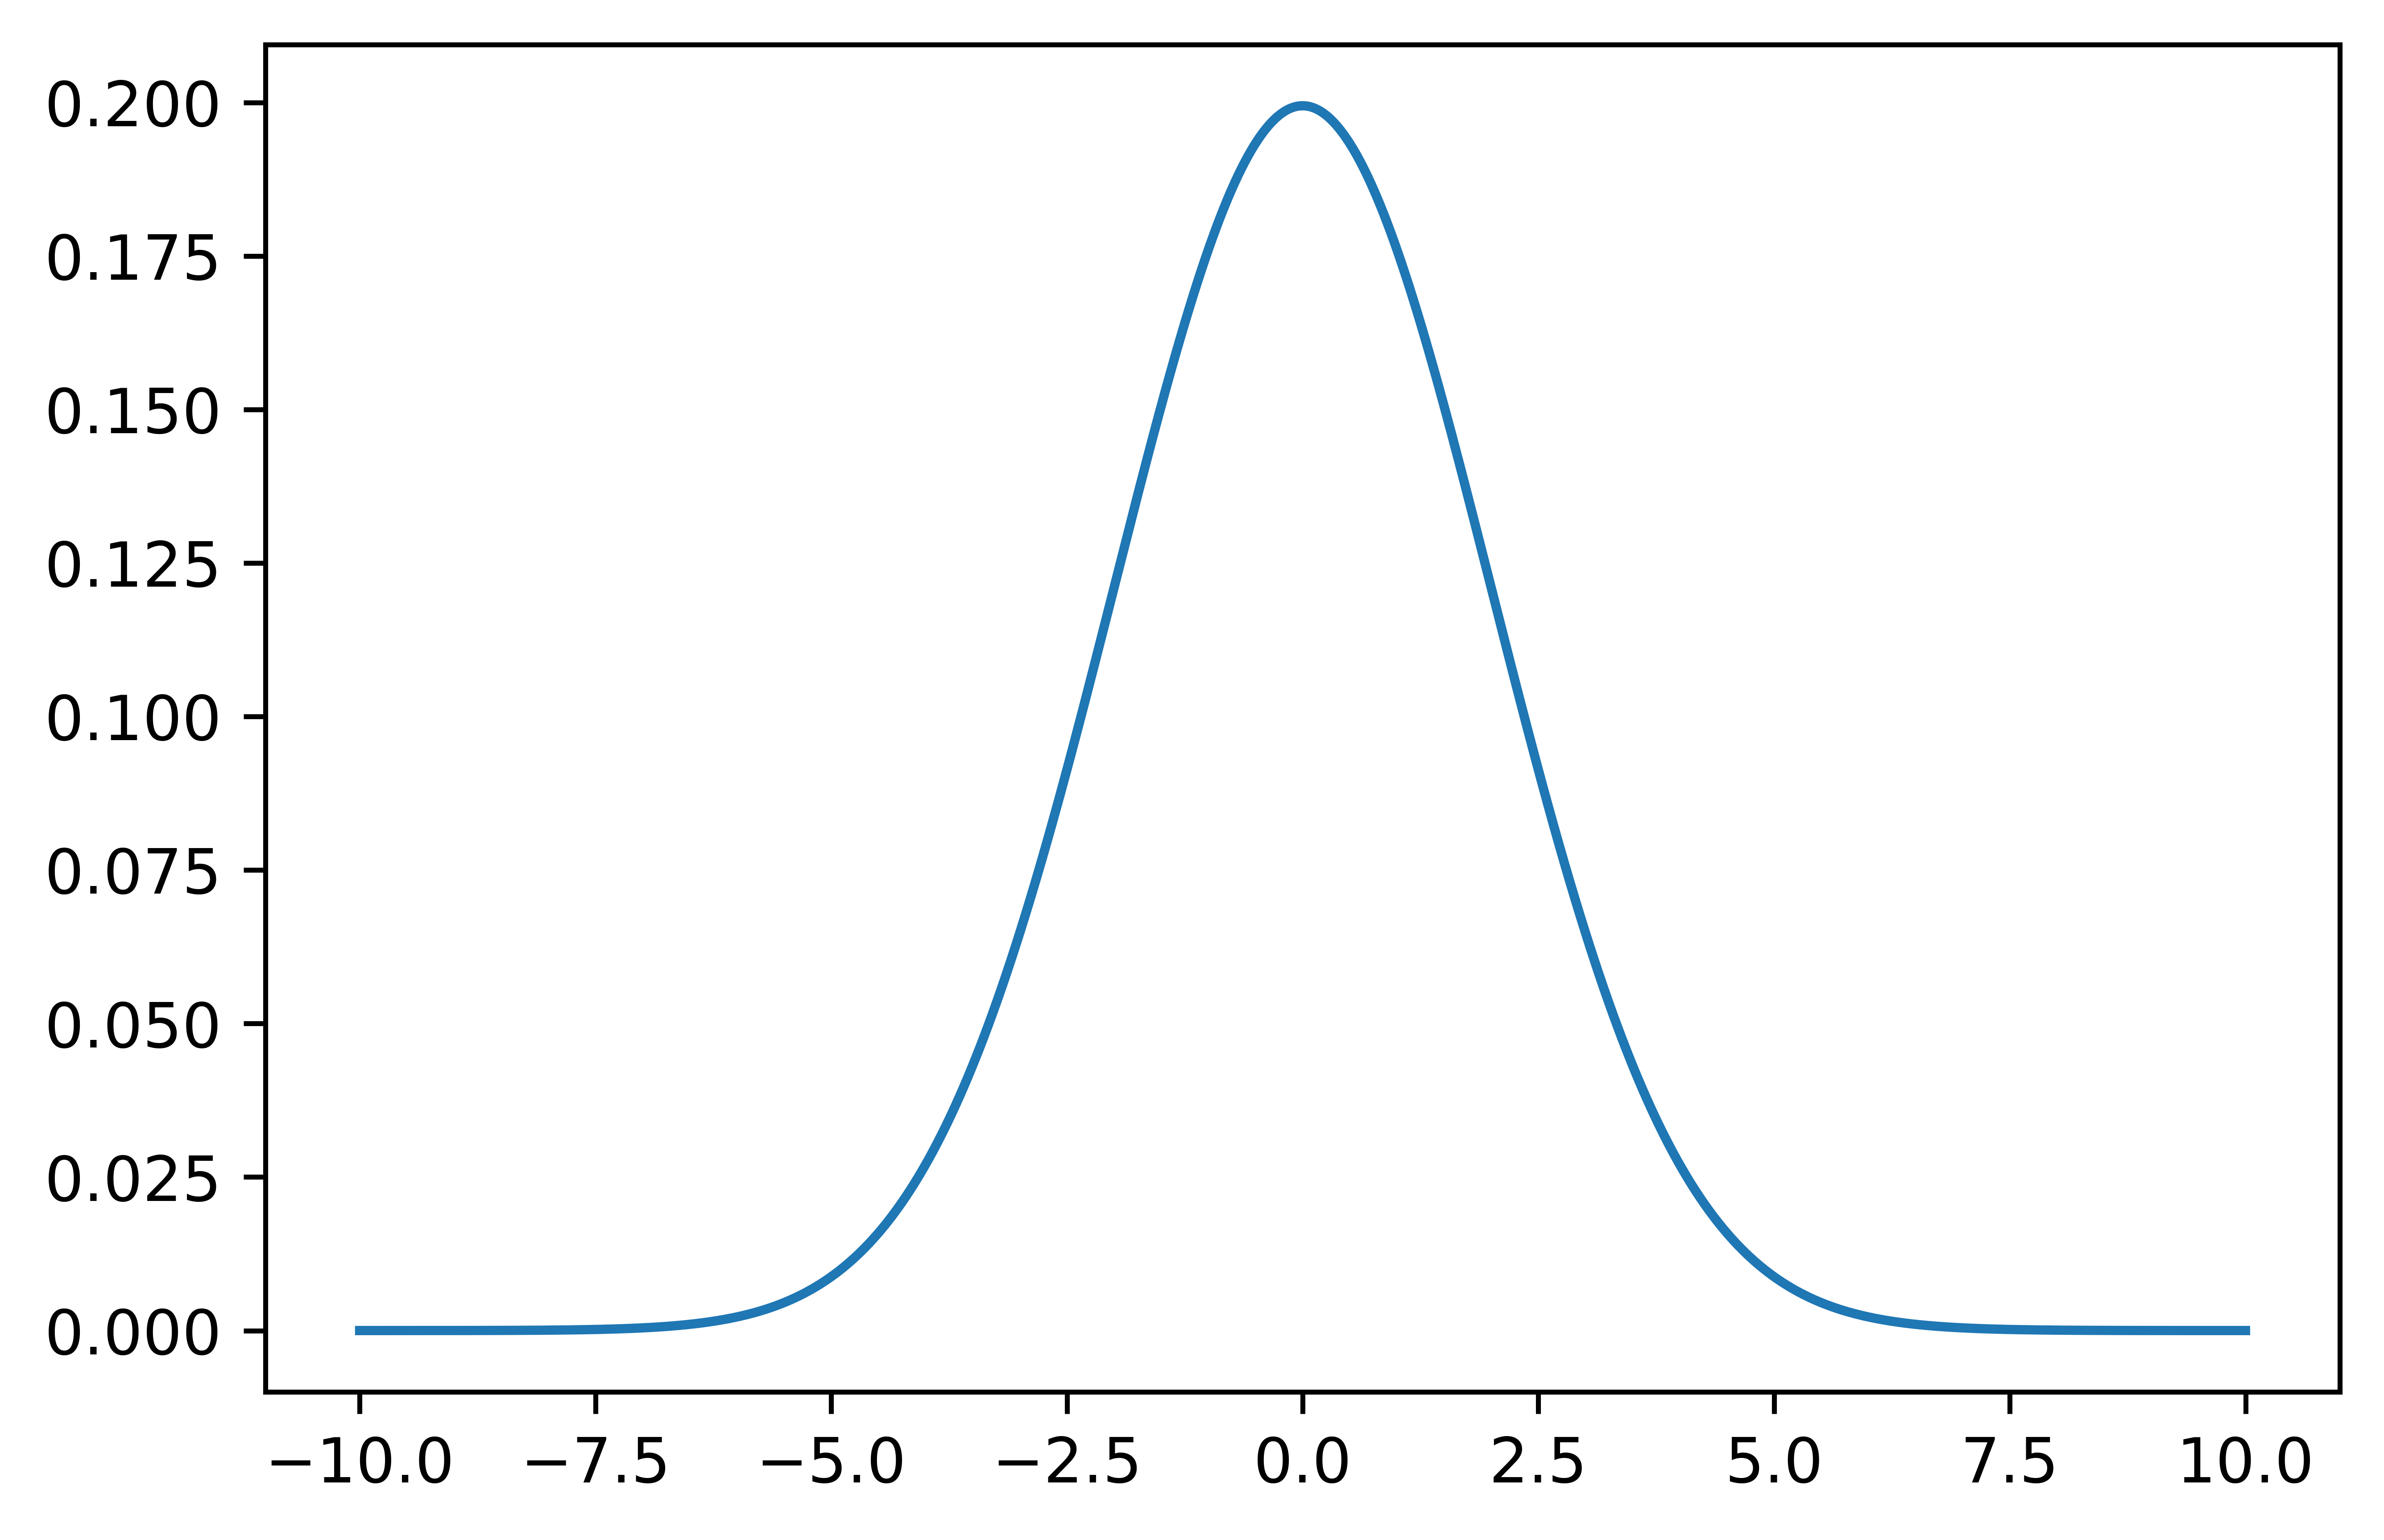

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,2))
plt.show

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arithmetic_mean', ylabel='Density'>

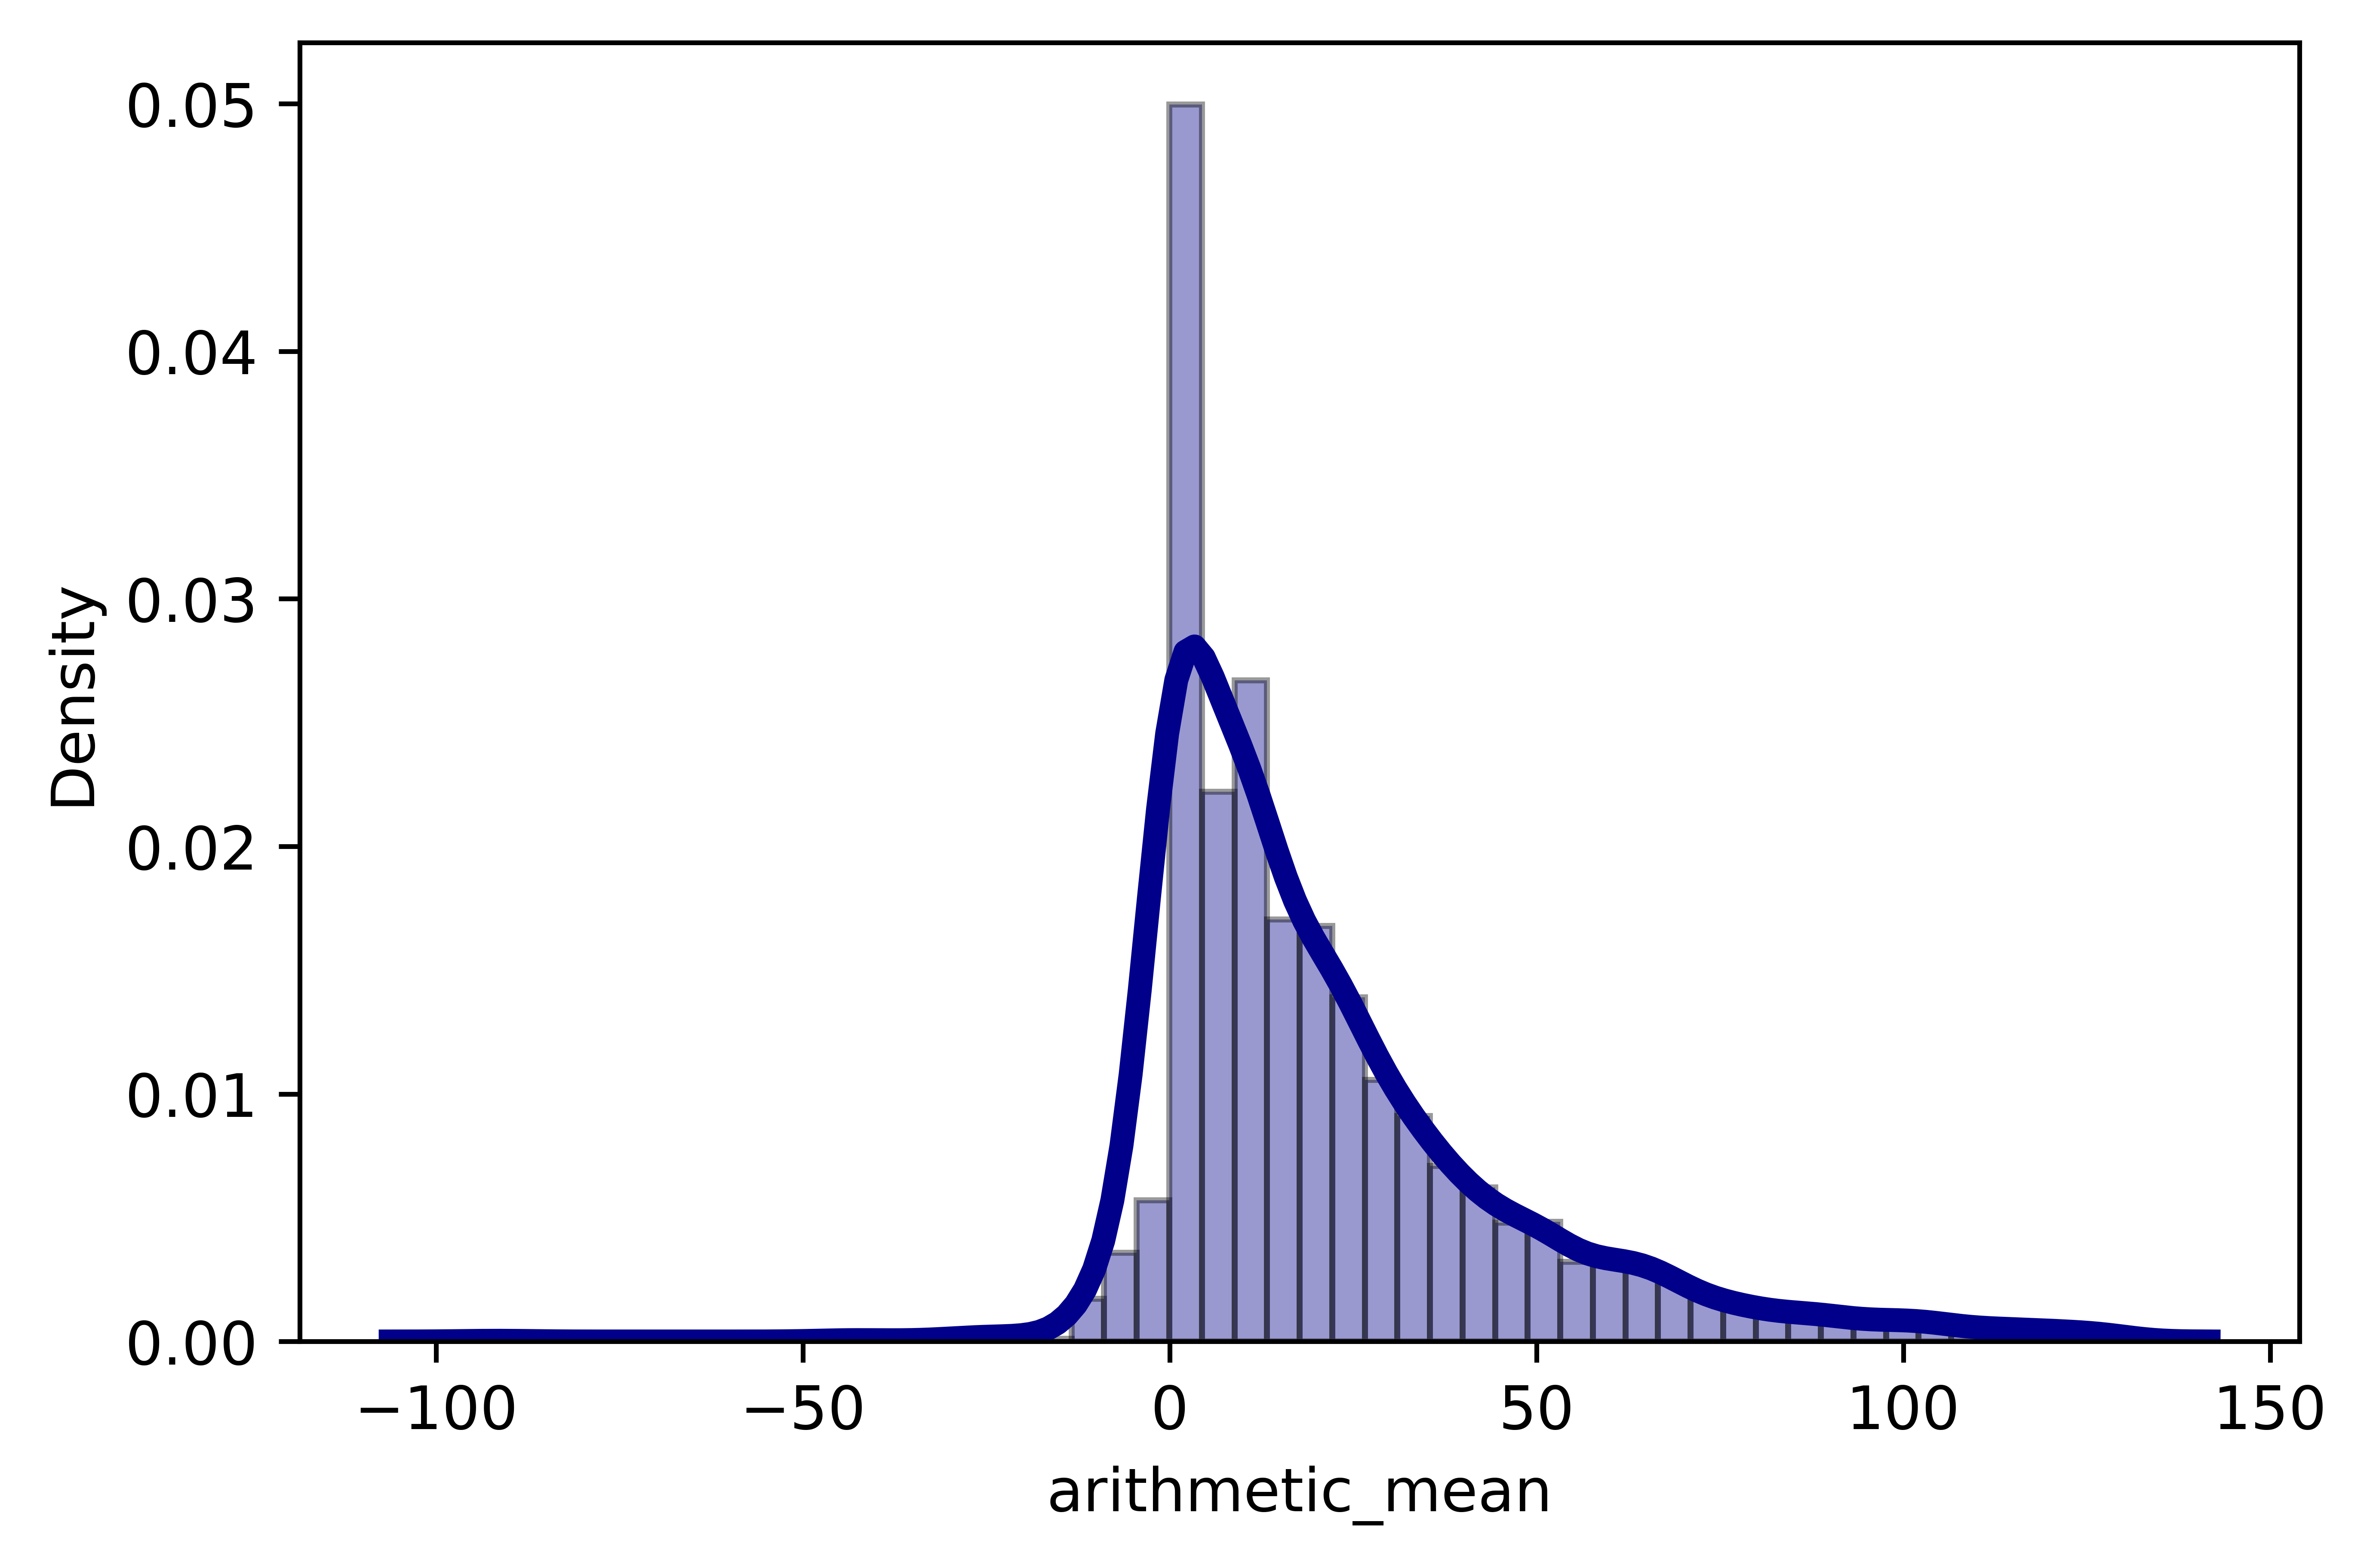

In [25]:
sns.distplot(sulfurDiOxide2020New['arithmetic_mean']*100, hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},norm_hist=True)

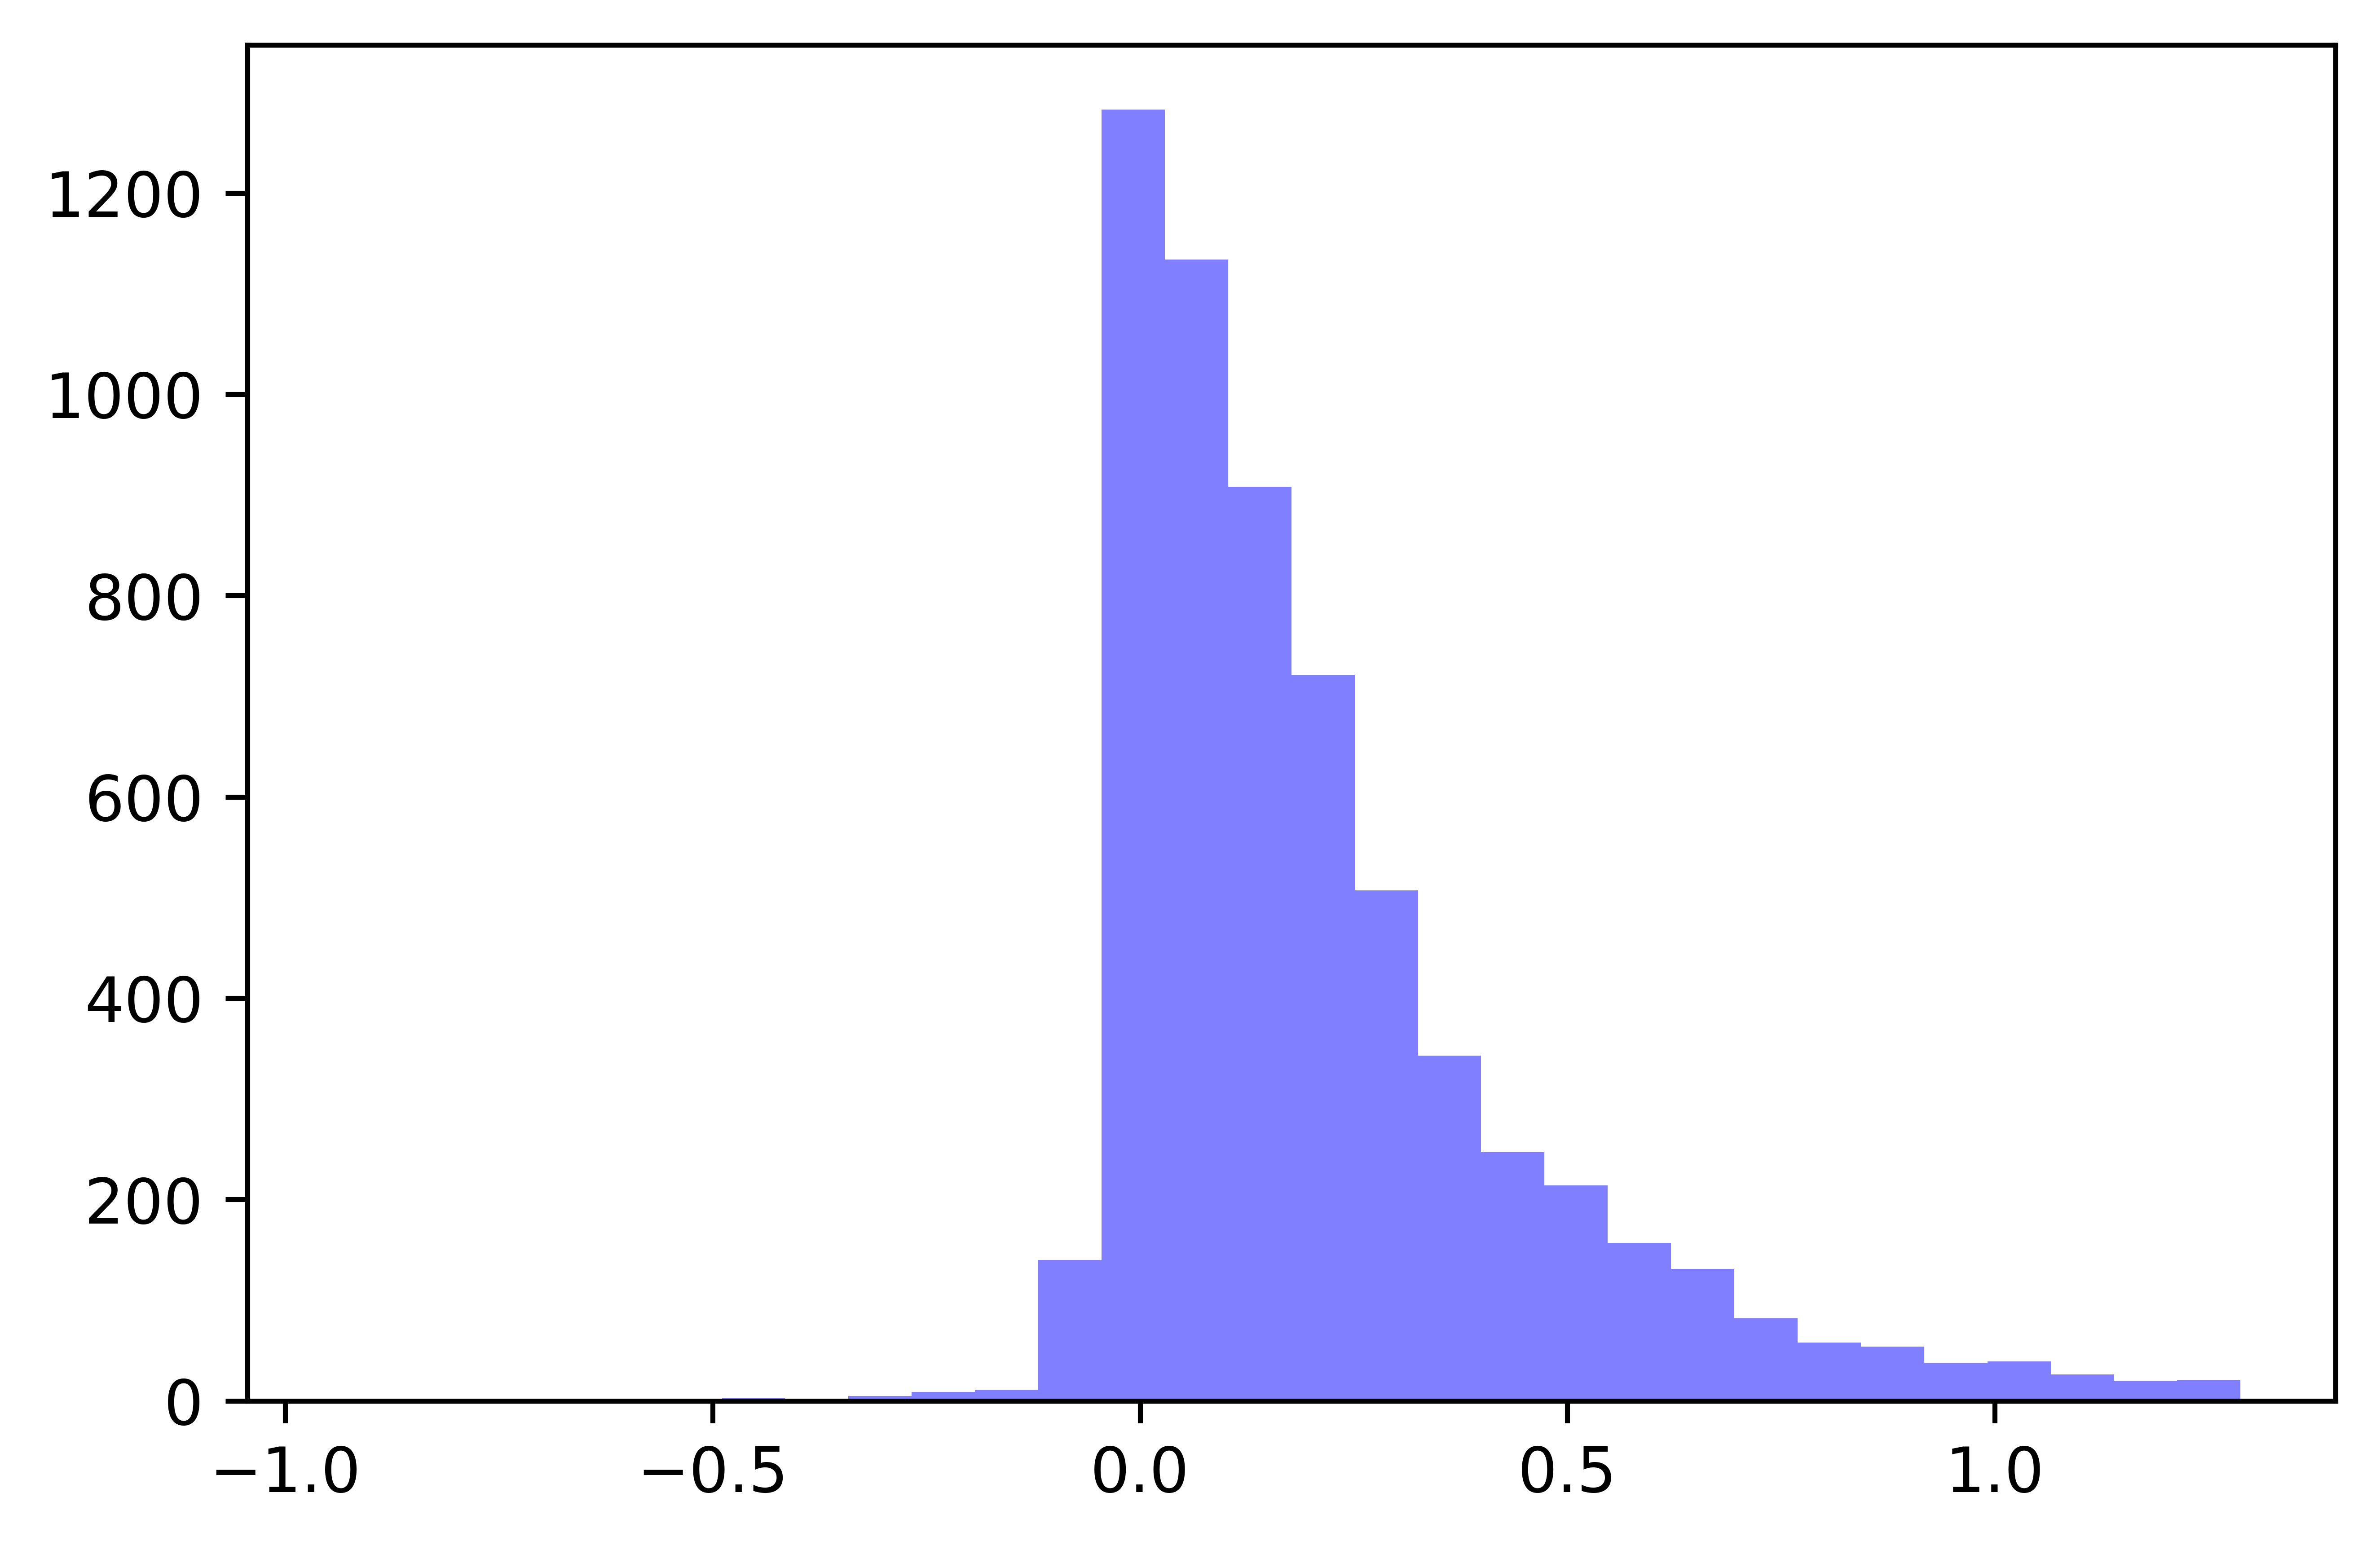

In [28]:
plt.hist(sulfurDiOxide2020New['arithmetic_mean'], bins=30, alpha=0.5,
histtype='stepfilled', color='blue',
edgecolor='none');

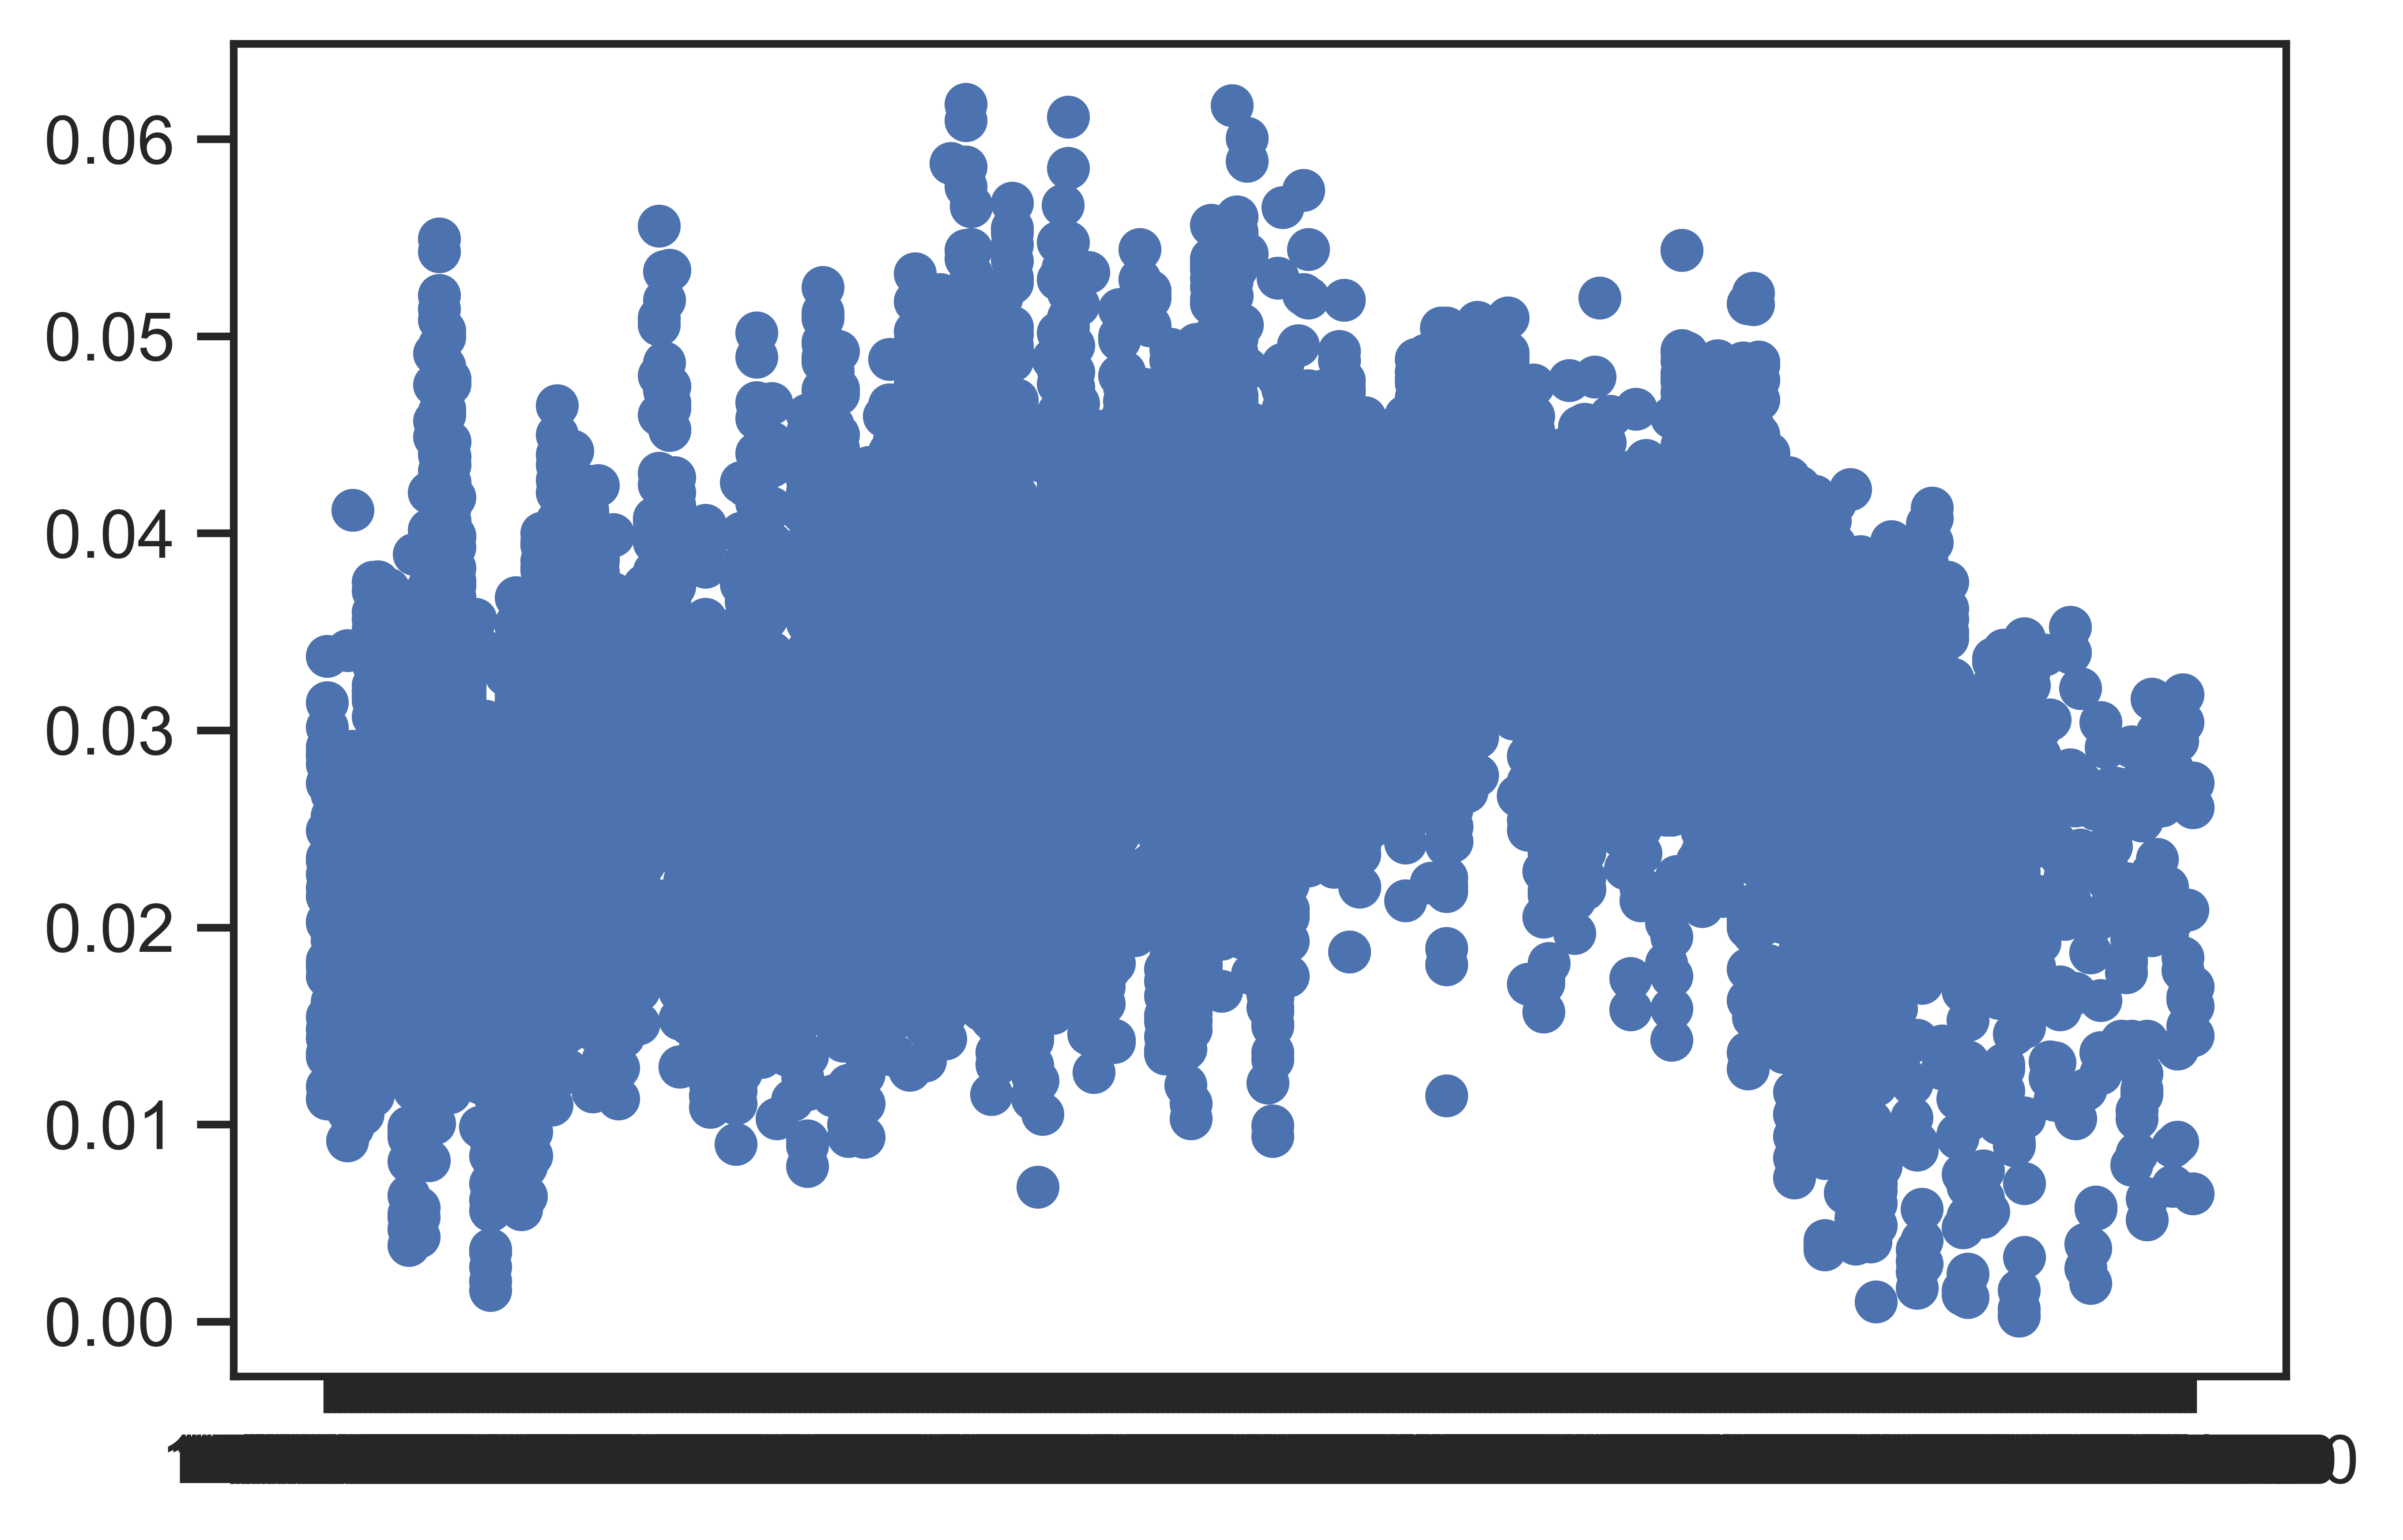

In [65]:
#group by date and average
plt.scatter(x=ozoneData2020New['date_local'], y=ozoneData2020New['arithmetic_mean'])

In [ ]:
sns.pairplot(df, hue="species")